## Bike Sharing Assignment

#### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.



#### Goal

1. Identify which variables are significant in predicting the demand for shared bikes
2. How well those variables describe the bike demands


#### Approach

1. Data Exploration
2. Data Visualisation
3. Data Preparation
4. Model building and evaluation

#### Importing required libraries and reading data

In [807]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import scipy as sp

In [808]:
bike_data = pd.read_csv('./Downloads/day.csv')

In [809]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Exploration

In [810]:
bike_data.shape

(730, 16)

In [811]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [812]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### checking for null values

In [813]:
for i in bike_data.columns:
    print(i,bike_data[i].isnull().sum())

instant 0
dteday 0
season 0
yr 0
mnth 0
holiday 0
weekday 0
workingday 0
weathersit 0
temp 0
atemp 0
hum 0
windspeed 0
casual 0
registered 0
cnt 0


#### Derived column

In [814]:
bike_data['date']=bike_data['dteday'].apply(lambda x:x.split('-')[0])

As below columns are not useful for predicting target variable dropping them.
1. instant : index column - so not used for analysis
2. target variable cnt is nothing but sum of casual and registered,hence dropping casual and registered columns
3. dteday : as all information of this column is present in different columns,this can be dropped.

In [815]:
bike_data=bike_data.drop(['casual','registered','instant','dteday'],axis=1,errors='ignore')

### Data Visualisation

<AxesSubplot:xlabel='cnt', ylabel='Density'>

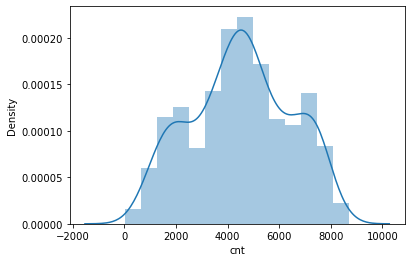

In [816]:
sns.distplot(bike_data['cnt'])

In [817]:
bike_data['season']=bike_data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_data['yr_n'] = bike_data['yr'].map({0:'2018', 1:'2019'})
bike_data['weathersit'] = bike_data['weathersit'].map({1:'clear',2:'mist',3:'light_snow',4:'heavy_rain'})
bike_data['workingday_n']=bike_data['workingday'].map({0:'holiday/weekend',1:'weekday'})
bike_data['holiday_n']=bike_data['workingday'].map({1:'holiday',0:'not holiday'})
bike_data['mnth'] = bike_data['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike_data['weekday'] = bike_data['weekday'].map({0:'tuesday',1:'wednesday',2:'thursday',3:'friday',4:'saturday',5:'sunday',6:'monday'})
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,date,yr_n,workingday_n,holiday_n
0,spring,0,Jan,0,monday,0,mist,14.110847,18.18125,80.5833,10.749882,985,01,2018,holiday/weekend,not holiday
1,spring,0,Jan,0,tuesday,0,mist,14.902598,17.68695,69.6087,16.652113,801,02,2018,holiday/weekend,not holiday
2,spring,0,Jan,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349,03,2018,weekday,holiday
3,spring,0,Jan,0,thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562,04,2018,weekday,holiday
4,spring,0,Jan,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600,05,2018,weekday,holiday


#### Univariate and Bivariate Analysis

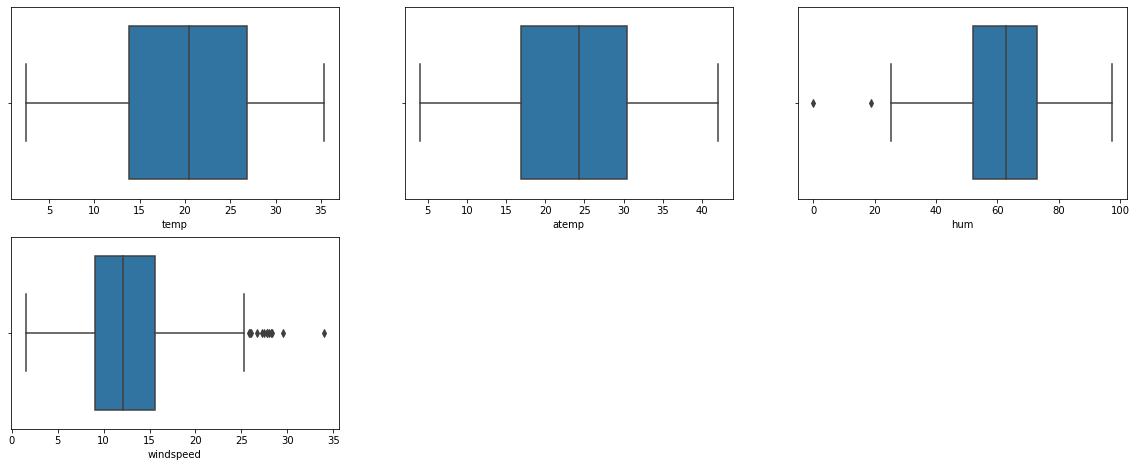

In [818]:
plt.figure(figsize=(20,12))
pstn=1
for i in ['temp','atemp','hum','windspeed']:
    plt.subplot(3,3,pstn)
    sns.boxplot(bike_data[i])
    pstn=pstn+1


Inference:
very few/no outliers in numerical columns except for windspeed.As dataset has only 730 records,removing the outliers will further reduce the size of dataset,ignoring outliers for winspeed as there are only few.
Interquartile range is same for temp and atemp.
Humidity values mostly ranges from 52 to 72

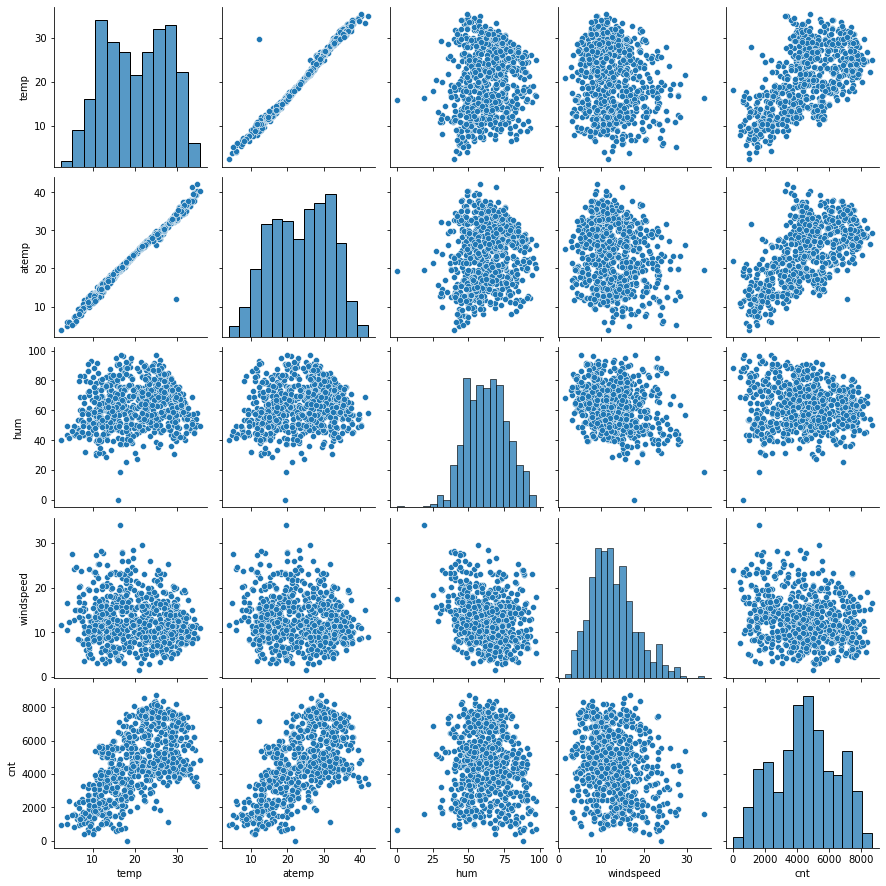

In [819]:
sns.pairplot(bike_data[['temp','atemp','hum','windspeed','cnt']])

Inference:Both temp and atemp are having high correlation with cnt column

<AxesSubplot:>

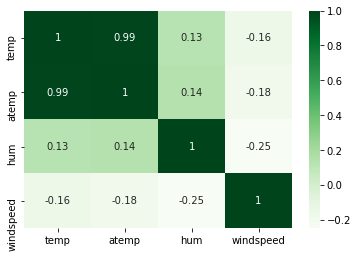

In [820]:
sns.heatmap(bike_data[['temp','atemp','hum','windspeed']].corr(),cmap='Greens',annot=True)

Inference: As temp and atemp are highly correlated we can drop one of them

In [821]:
bike_data = bike_data.drop('atemp',axis=1)

<AxesSubplot:xlabel='cnt', ylabel='Count'>

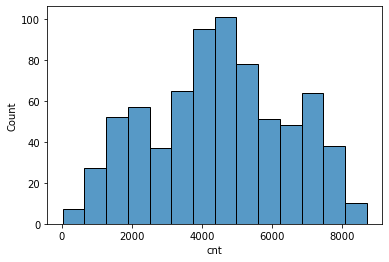

In [822]:
sns.histplot(bike_data['cnt'])

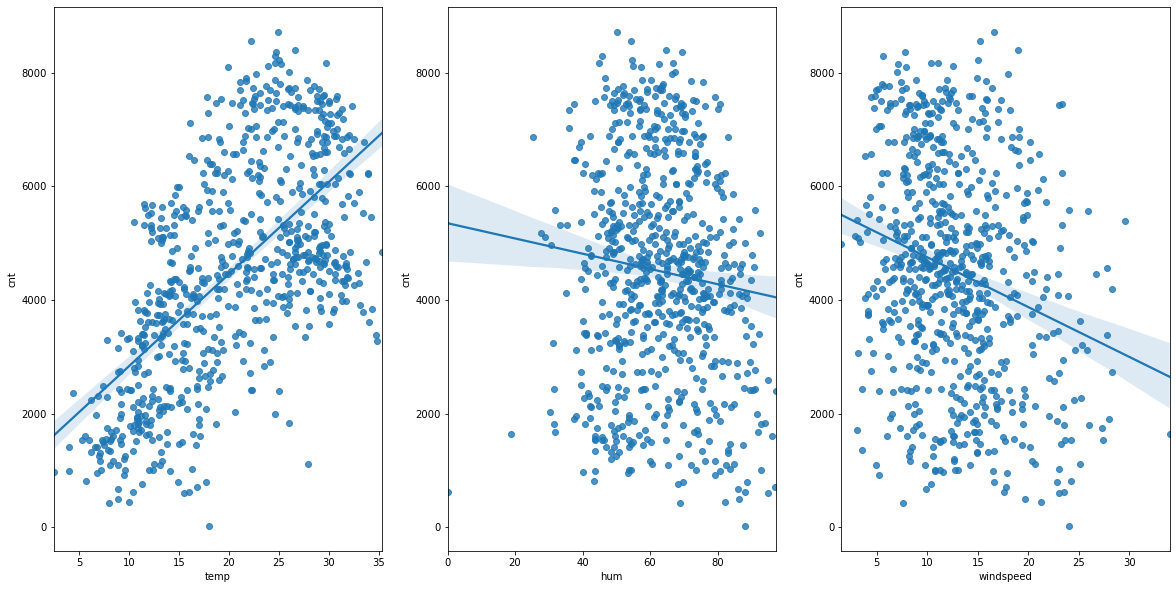

In [823]:
plt.figure(figsize=(20,10))
pstn=1
for i in ['temp','hum','windspeed']:
    plt.subplot(1,3,pstn)
    sns.regplot(x=i,y='cnt',data=bike_data)
    pstn=pstn+1
#sns.pairplot(x_vars=,y_vars='cnt',data=bike_data)

Inference : temperature is having clear linear relationship with cnt i.e as the temperatures are increasing no of people taking bikes 
are also increasing.
cnt is decreasing with increase in Windspeed and humidity

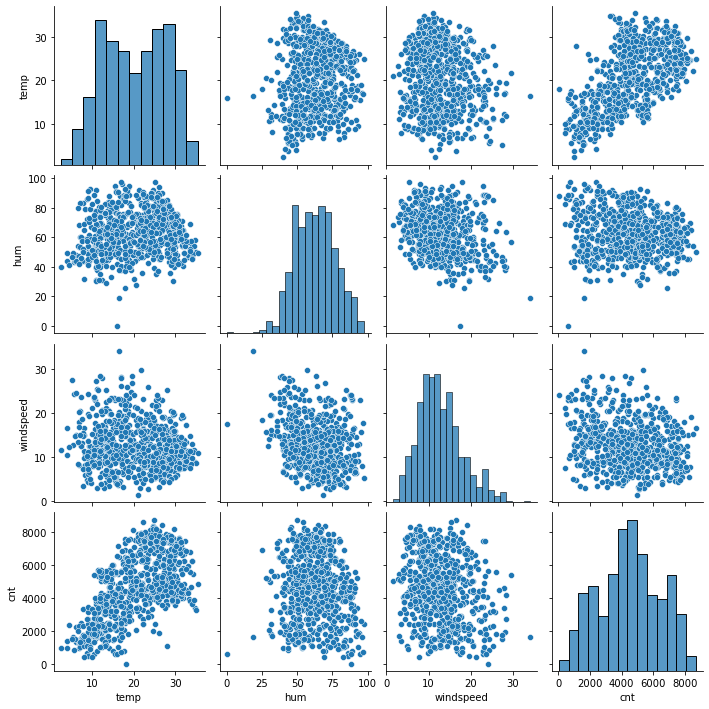

In [824]:
sns.pairplot(bike_data[['temp','hum','windspeed','cnt']])

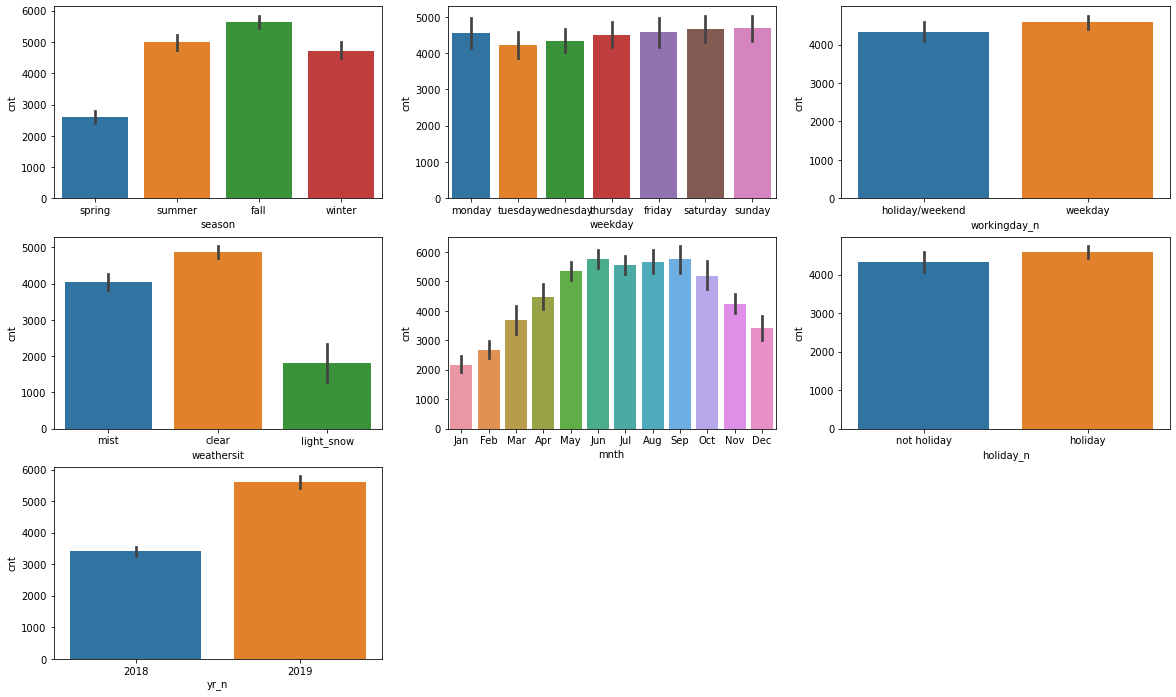

In [825]:
plt.figure(figsize=(20,12))
pstn=1
for i in ['season','weekday','workingday_n','weathersit','mnth','holiday_n','yr_n']:
    plt.subplot(3,3,pstn)
    sns.barplot(x=i,y='cnt',data=bike_data)
    pstn=pstn+1

plt.show()
    
    

Inference:
Most of the people are taking bikes when the weather is clear
Usage of bikes is high in months of June,July,Aug and September.
Demand of bikes has increased in 2019 when compared to 2018.
Borrowing bikes is high during fall.
Demand of bikes is slightly high on weekday,but there is no significant difference and same is the case with holiday/not holiday.
Demand of bikes is slightly high on holiday but no significant difference.


    

In [826]:
bike_data=bike_data.drop([i for i in bike_data.columns if i[-2:]=='_n'],errors='ignore',axis=1)
bike_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'date'],
      dtype='object')

<AxesSubplot:>

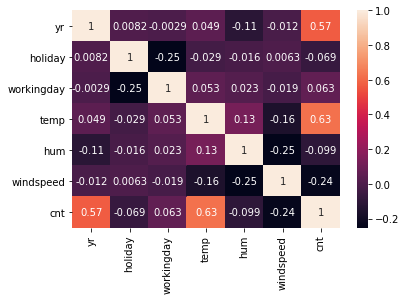

In [827]:
sns.heatmap(bike_data.corr(),annot=True)

Inference : Year and temperature columns are having high positive correlation with cnt column

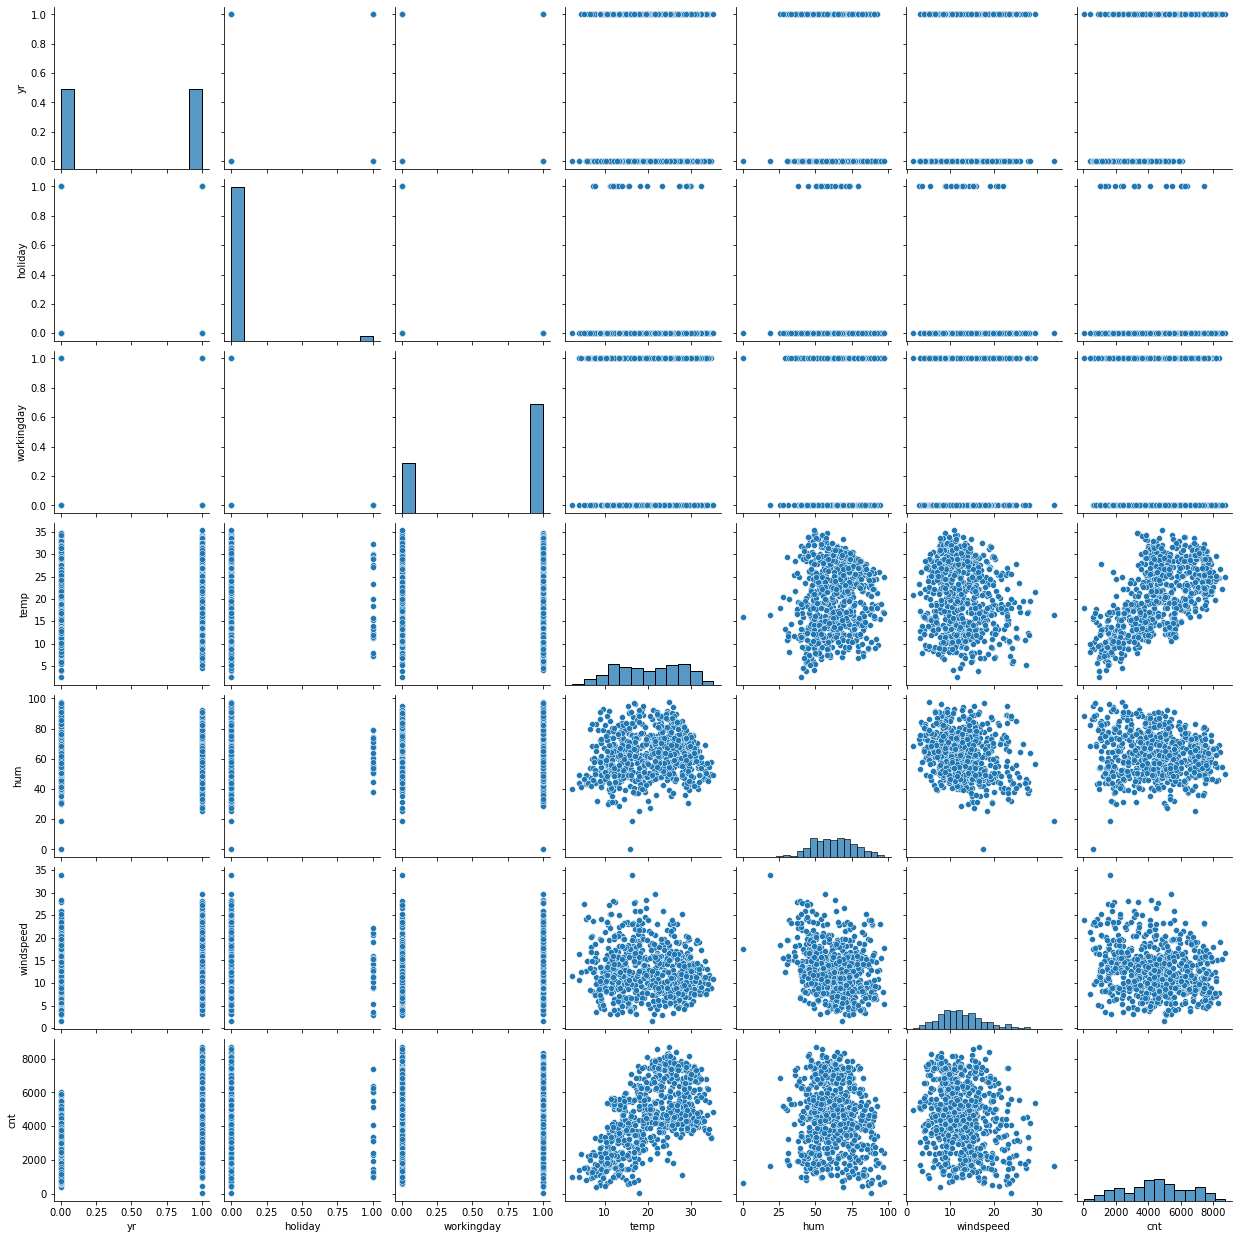

In [828]:
sns.pairplot(bike_data)

### Data Preparation

Dummy variables creation

In [829]:
dummy_var_list=['season','mnth','weekday','weathersit']
dummy_variables=pd.get_dummies(bike_data[dummy_var_list],drop_first=True)

In [830]:
dummy_variables.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_snow,weathersit_mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Adding results to original dataset

In [831]:
bike_data_v2 = pd.concat([bike_data,dummy_variables],axis=1)

In [832]:
bike_data_v2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_snow,weathersit_mist
0,spring,0,Jan,0,monday,0,mist,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,tuesday,0,mist,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,wednesday,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,thursday,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,friday,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


Dropping original columns as dummy variables are created 

In [833]:
bike_data_v2=bike_data_v2.drop(dummy_var_list,axis=1,errors='ignore')
bike_data_v2.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,date,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_snow,weathersit_mist
0,0,0,0,14.110847,80.5833,10.749882,985,01,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,02,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,03,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,04,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,05,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Splitting the data into Train and test sets

In [834]:
df_train,df_test=train_test_split(bike_data_v2,train_size=0.7,random_state=100)
df_train.shape,df_test.shape

((510, 30), (220, 30))

#### Rescaling features using MinMaxscaler

In [835]:
rescale_vars=['temp','hum','windspeed','date','cnt']
scaler=MinMaxScaler()
df_train[rescale_vars]=scaler.fit_transform(df_train[rescale_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,date,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_snow,weathersit_mist
576,1,0,1,0.815169,0.725633,0.264686,0.827658,1.000000,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0.066667,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0.966667,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0.900000,0,1,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0.700000,0,1,...,0,0,0,0,1,0,0,0,0,1


#### Dividing into X and y sets for model building

In [836]:
y_train=df_train.pop('cnt')
X_train=df_train

### Model Building and Evaluation

##### RFE - Recursive Feature Elimination

In [837]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [838]:
len(X_train.columns)

29

In [839]:
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [840]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('date', False, 15),
 ('season_spring', False, 3),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', False, 14),
 ('mnth_Feb', False, 13),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 7),
 ('mnth_Jun', False, 5),
 ('mnth_Mar', False, 6),
 ('mnth_May', False, 4),
 ('mnth_Nov', False, 11),
 ('mnth_Oct', False, 2),
 ('mnth_Sep', True, 1),
 ('weekday_monday', True, 1),
 ('weekday_saturday', False, 12),
 ('weekday_sunday', False, 10),
 ('weekday_thursday', False, 9),
 ('weekday_tuesday', True, 1),
 ('weekday_wednesday', False, 8),
 ('weathersit_light_snow', True, 1),
 ('weathersit_mist', True, 1)]

In [841]:
col=X_train.columns[rfe.support_]
col  

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Jan', 'mnth_Sep',
       'weekday_monday', 'weekday_tuesday', 'weathersit_light_snow',
       'weathersit_mist'],
      dtype='object')

#### Building model using statsmodels 

Iteration 1

In [842]:
def build_model_stats(X,y):
    X_train_rfe = sm.add_constant(X)
    lm=sm.OLS(y,X_train_rfe).fit()
    return (lm,X_train_rfe)

In [843]:
X_train_rfe = X_train[col]

In [844]:
print(build_model_stats(X_train_rfe,y_train)[0].summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.01e-191
Time:                        17:10:47   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

P-value for holiday column is 0.262 which is greater than 0.05 ,so its coefficient is insignificant.
Dropping the holiday column and building the model again

Iteration 2

In [845]:
X_train_rfe = X_train_rfe.drop('holiday',axis=1,errors='ignore')
print(build_model_stats(X_train_rfe,y_train)[0].summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.01e-191
Time:                        17:10:47   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

#### Calculate the VIFs for the new model

In [846]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif(X_train):
    vif=pd.DataFrame()
    X=X_train
    vif['Features']=X.columns
    vif['VIF']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return vif

In [847]:
get_vif(X_train_rfe)

,Features,VIF
3,hum,27.03
1,workingday,16.02
2,temp,12.26
4,windspeed,4.35
10,weekday_monday,4.35
11,weekday_tuesday,4.25
13,weathersit_mist,2.22
0,yr,2.07
6,season_winter,2.06
5,season_summer,1.97


As p-values of all columns are less than 0.05 , VIF is calculated for all columns.
As humidity column is having high vif value,(>10),dropping the hum column and building model again

Iteration 3

In [848]:
X_train_rfe = X_train_rfe.drop('hum',axis=1,errors='ignore')
print(build_model_stats(X_train_rfe,y_train)[0].summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          6.55e-189
Time:                        17:10:47   Log-Likelihood:                 508.90
No. Observations:                 510   AIC:                            -989.8
Df Residuals:                     496   BIC:                            -930.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.06

In [849]:
get_vif(X_train_rfe)

,Features,VIF
1,workingday,10.87
2,temp,9.88
3,windspeed,4.35
9,weekday_monday,3.25
10,weekday_tuesday,3.04
0,yr,2.06
4,season_summer,1.94
5,season_winter,1.80
6,mnth_Aug,1.60
12,weathersit_mist,1.60


As p-values of all columns are less than 0.05 , VIF is calculated for all columns.
As workingday column is having high vif value,(>10),dropping the working day column and building model again

Iteration 4

In [850]:
X_train_rfe = X_train_rfe.drop('workingday',axis=1,errors='ignore')
print(build_model_stats(X_train_rfe,y_train)[0].summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          8.65e-187
Time:                        17:10:47   Log-Likelihood:                 501.07
No. Observations:                 510   AIC:                            -976.1
Df Residuals:                     497   BIC:                            -921.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

As p-value of weekday_monday column is more than 0.05,its coefficient is insignificant.Hence dropping weekday_monday column and building
model again

In [851]:
X_train_rfe = X_train_rfe.drop('weekday_monday',axis=1,errors='ignore')
X_train_lm= build_model_stats(X_train_rfe,y_train)[1]
lm_model=build_model_stats(X_train_rfe,y_train)[0]
print(lm_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.1
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.27e-187
Time:                        17:10:47   Log-Likelihood:                 500.22
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     498   BIC:                            -925.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [852]:
X_train_rfe = X_train_rfe.drop('const',axis=1,errors='ignore')
get_vif(X_train_rfe)

,Features,VIF
1,temp,5.13
2,windspeed,3.34
0,yr,2.04
3,season_summer,1.89
5,mnth_Aug,1.60
4,season_winter,1.55
10,weathersit_mist,1.54
7,mnth_Sep,1.31
6,mnth_Jan,1.22
8,weekday_tuesday,1.17


As p-values of all features are under 0.05 and VIF for all features is less than 5  (for temp as vif is only very slighlty higher and also as temp has high postive correlation with target column)we can consider these features describe the bike demands.

#### Residual Analysis of train data

Text(0.5, 1.0, 'Residual plot')

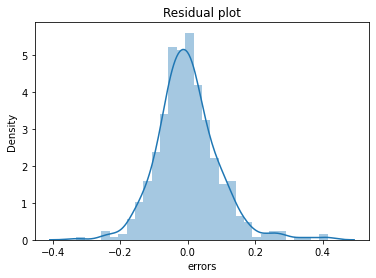

In [853]:
y_train_predict=lm_model.predict(X_train_lm)
residual = y_train_predict - y_train
sns.distplot(residual)
plt.xlabel('errors')
plt.title('Residual plot')

From the above graph error terms are normally distributed with mean zero

Looking for patterns when error terms are plotted

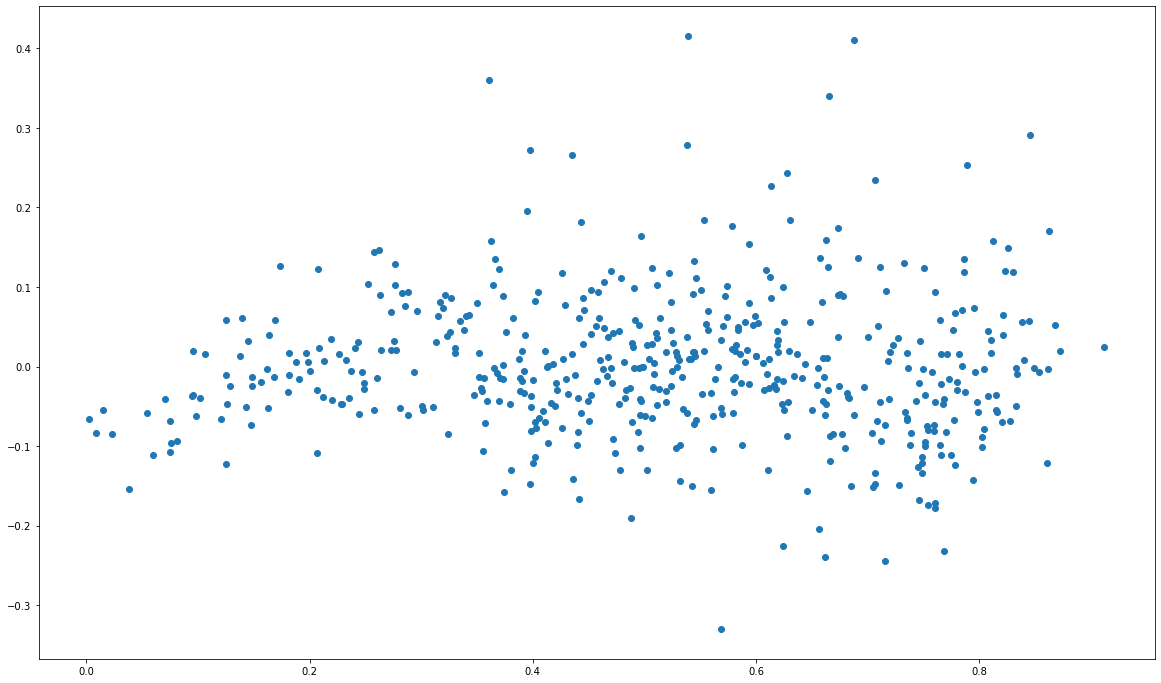

In [854]:
fig, ax = plt.subplots(figsize=(20,12))
_ = ax.scatter(y_train_predict, residual)

It can be observed that all points are scattered around 0 randomly and there is no pattern,though most of values are densed around 0

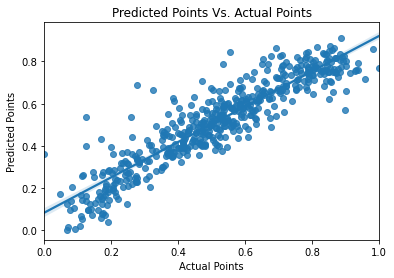

In [855]:
sns.regplot(x=y_train, y=y_train_predict)
plt.title('Predicted Points Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

#### Making predictions

Applying scaling on test sets

In [856]:
rescale_vars=['temp','hum','windspeed','date','cnt']
df_test[rescale_vars]=scaler.transform(df_test[rescale_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,date,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_snow,weathersit_mist
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0.100000,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0.633333,0,1,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0.866667,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0.300000,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0.033333,0,1,...,0,0,0,1,0,0,0,0,0,0


#### Dividing into X and y sets

In [857]:
y_test = df_test.pop('cnt')
X_test=df_test

In [858]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [859]:
# Making predictions
y_pred = lm_model.predict(X_test_new)

### Model Evaluation

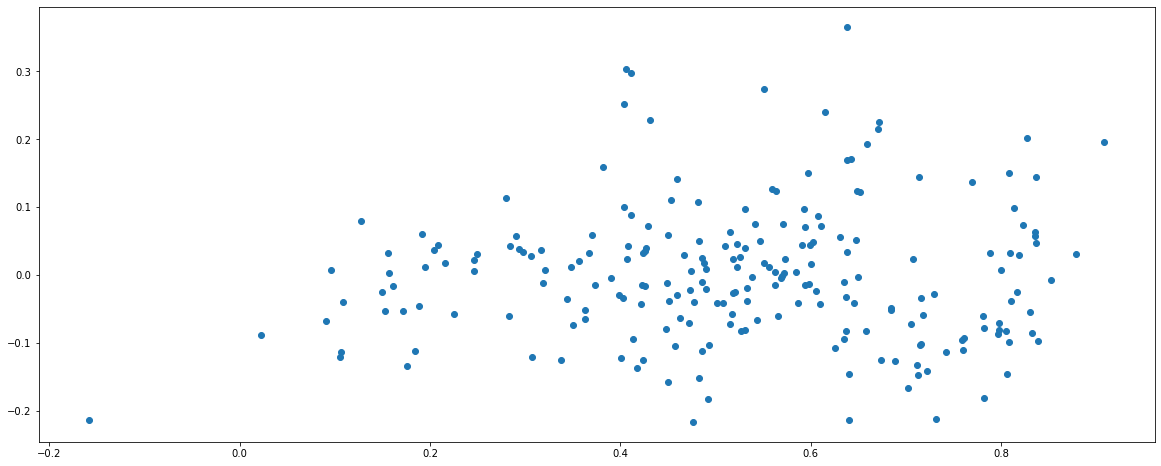

In [860]:
# Plotting y_test and y_pred to understand the spread.
residual = y_pred-y_test
fig, ax = plt.subplots(figsize=(20,8))
_ = ax.scatter(y_pred, residual)

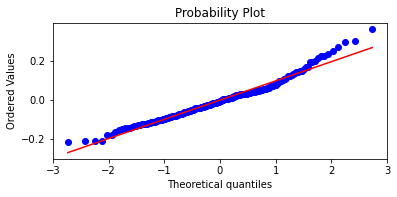

In [861]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

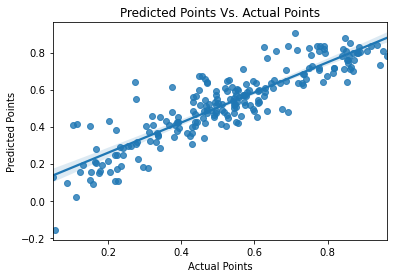

In [862]:
sns.regplot(x=y_test, y=y_pred)
plt.title('Predicted Points Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

### Generating R2-score

In [863]:
from sklearn.metrics import r2_score

In [864]:
print("r2 score: %.2f" %r2_score(y_test, y_pred))

r2 score: 0.79
